In [26]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from sklearn.metrics import confusion_matrix , classification_report
###Importing all the relevant libraries required for Image Classification

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()  #Loading the Mnist data from keras library and splitting 
                                                                    # them between train and test

In [3]:
x_train.shape

(60000, 28, 28)

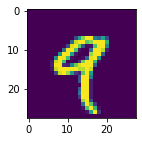

In [4]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[4])

In [5]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
x_train = x_train/255           ###Resizing the images ranging between 0 and 1
x_test = x_test/255             

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train = x_train.reshape(len(x_train),28,28,1)  ###Reshaping the images
x_test = x_test.reshape(len(x_test),28,28,1)

In [11]:
x_train.shape

(60000, 28, 28, 1)

In [12]:
###Keras Tuner model to select the best number of parameters by choosing the appropriate values
def build_model(hp):  
  model = Sequential([
        Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
        Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
        Flatten(),
        Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
        Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [13]:
tuner_search=RandomSearch(build_model,   ###Fitting the model into tuner with the number of trials
                          objective='val_accuracy',
                          max_trials=2,directory='output',project_name="Mnist")

In [14]:
tuner_search.search(x_train,y_train,epochs=3,validation_split=0.15)    ###Finally performing training and seleting the best 
                                                                       ###model for best accuracy

Trial 2 Complete [00h 10m 22s]
val_accuracy: 0.9624444246292114

Best val_accuracy So Far: 0.9755555391311646
Total elapsed time: 00h 31m 05s
INFO:tensorflow:Oracle triggered exit


In [15]:
models = tuner_search.get_best_models(num_models=1)          ###Saving the best model

In [16]:
model = models[0]

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 96)        2496      
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 48)        115248    
                                                                 
 flatten (Flatten)           (None, 19200)             0         
                                                                 
 dense (Dense)               (None, 48)                921648    
                                                                 
 dense_1 (Dense)             (None, 10)                490       
                                                                 
Total params: 1,039,882
Trainable params: 1,039,882
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(x_train, y_train, epochs=7, validation_split=0.15, initial_epoch=3)  ###Finally Training the best model and 
                                                                               ###obtaining the accuracy

Epoch 4/7
1594/1594 [==============================] - 382s 240ms/step - loss: 0.0863 - accuracy: 0.9764 - val_loss: 0.0870 - val_accuracy: 0.9778
Epoch 5/7
1594/1594 [==============================] - 378s 237ms/step - loss: 0.0766 - accuracy: 0.9807 - val_loss: 0.1096 - val_accuracy: 0.9731
Epoch 6/7
1594/1594 [==============================] - 376s 236ms/step - loss: 0.0693 - accuracy: 0.9828 - val_loss: 0.1186 - val_accuracy: 0.9780
Epoch 7/7
1594/1594 [==============================] - 302s 189ms/step - loss: 0.0674 - accuracy: 0.9840 - val_loss: 0.1807 - val_accuracy: 0.9730


In [27]:
y_pred = model.predict(x_test)   ###Predicting the test images

In [28]:
y_pred_classes = [np.argmax(element) for element in y_pred]  ###Getting the report

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.94      0.99      0.97       982
           5       0.95      0.97      0.96       892
           6       0.97      0.98      0.97       958
           7       0.98      0.96      0.97      1028
           8       0.98      0.95      0.96       974
           9       0.98      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [35]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[7, 2, 1, 0, 4]

In [36]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

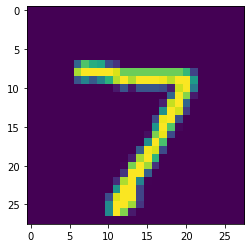

In [43]:
plt.imshow(x_test[0])